# Question 1 what is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically? What would you describe is the key "criteria" defining what a good null hypothesis is? And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing?

First of all, ideas that can or cannot be tested quantifiability through data. for example, Pato would have been a better president than Gandi

Second of all, a good null hypothesis consists of testability (that it is able to be tested) and that it is also able to be proven false.

Thridly, the difference between  null hypothesis and an alternative hypothesis is the null hypothesis tests for no effect and the alternative hypothesis tests for significant effect that can be analyzed through the data.



# Question 2 Explaining things simply...


#### Population: 
This is the whole group we want to learn about .
#### Sample:
This is the smaller group we collect data from, which we hope represents the population .
#### Sample statistic: 
This is a number that describes something about the sample .
#### Population parameter: 
This is the true number that describes the entire population.
#### Null Hypothesis:
This is the default assumption we start with in hypothesis testing
#### Alternative Hypothesis: 
This opposes the null hypothesis and suggests that the population's true average value is different from that specific number
#### Observed Sample Values: 
These are the individual data points we collect from the sample.
#### Sample Average:
This is the average of all the sample values. It gives us a single number that represents the center of the sample data.

# Question 3 

When we calculate a p-value we imagine a world where the null hypothesis is true  because we are trying to figure out how likely our data is if the assumption we’re testing against is actually correct.

# Question 4
The null hypothesis appears more "ridiculous" when the p-value is less since it indicates how unlikely it is that the data we saw would occur if the null hypothesis were correct.

Let me illustrate using an example:

The premise that there is no difference or impact (e.g., "The new drug has no effect on blood pressure") is known as the null hypothesis.
P-value: Assuming the null hypothesis is true, this is the likelihood that we will really observe the data (or something more extreme).


# Question 5

Observed number of right tilts: 80
P-value: 0.0013


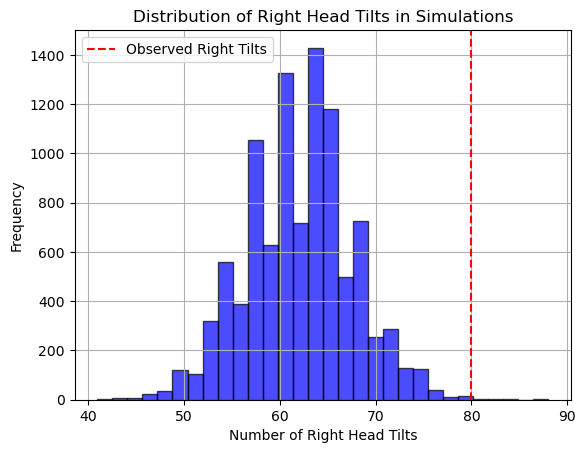

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
num_couples = 124
num_tilts_right = 80  # observed number of couples tilting right
num_tilts_left = num_couples - num_tilts_right  # number of couples tilting left

# Simulation settings
num_simulations = 10000  # number of simulations
results = np.random.binomial(n=num_couples, p=0.5, size=num_simulations)

# Calculate the p-value
p_value = np.mean(results >= num_tilts_right)

# Output results
print(f"Observed number of right tilts: {num_tilts_right}")
print(f"P-value: {p_value}")

# Plotting the distribution of simulated results
plt.hist(results, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=num_tilts_right, color='red', linestyle='--', label='Observed Right Tilts')
plt.title('Distribution of Right Head Tilts in Simulations')
plt.xlabel('Number of Right Head Tilts')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

based on this p-value we can say that there is strong evidence to reject the null hypothesis 

# Question 6

first of all, A lower p-value does not provide conclusive evidence against the null hypothesis. When doing a hypothesis test, the p-value indicates the likelihood of the observed data—or something more extreme—if the null hypothesis is correct. A tiny p-value indicates that the evidence is not likely to support the null hypothesis, which leads us to reject it rather than demonstrate its falsity.

second of all, is it possible for a p-value to conclusively establish Fido's guilt? No. Although a low p-value suggests that Fido is guilty, it does not establish Fido's guilt beyond a reasonable doubt. The observed result might always have been the result of random chance.

Third of all, a p-value—regardless of how high or low—cannot provide conclusive evidence in a statistical analysis.

# Question 7  


In [5]:
import pandas as pd
from scipy import stats

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Calculate the change in health scores
data['HealthChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Null hypothesis value (no effect)
null_hypothesis_value = 0

# Perform a one-sample t-test (two-tailed)
t_stat, p_value_two_tailed = stats.ttest_1samp(data['HealthChange'], null_hypothesis_value)

# For one-tailed test (testing if the mean change is greater than 0)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)

# Output the results
print(f'T-statistic: {t_stat}')
print(f'Two-tailed p-value: {p_value_two_tailed}')
print(f'One-tailed p-value: {p_value_one_tailed}')

T-statistic: 2.5900615612703937
Two-tailed p-value: 0.02921052381549256
One-tailed p-value: 0.01460526190774628


## What Changed?
Well basically what we are doing is hypothesis Testing vs. Bootstrapping. The difference is the original focuses on understanding the data through visualizations and estimating the mean difference via bootstrapping. The second code I just provided here is geared toward hypothesis testing, providing a formal way to reject or fail to reject the null hypothesis about the vaccine's effectiveness. 
## Expected Differences in P-Values
In a one-tailed test, the p-value is expected to be smaller than or equal to the corresponding two-tailed p-value (when testing for improvement). This is because the one-tailed test only considers one side of the distribution, which often results in a more favorable outcome when there's a clear directional hypothesis.

# Question 8 
#### Problem Introduction
The Fisher's Tea Experiment is a classic statistical study that investigates whether there is a discernible difference in taste when milk is added to tea either before or after the tea is poured. This report explores a similar experiment involving 80 students from STA130 to determine if they can accurately identify the order of milk and tea being poured.

### Consider the following visualization

/tmp/ipykernel_71/1058793675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Order", y="Correct Identifications", data=df, palette="pastel")


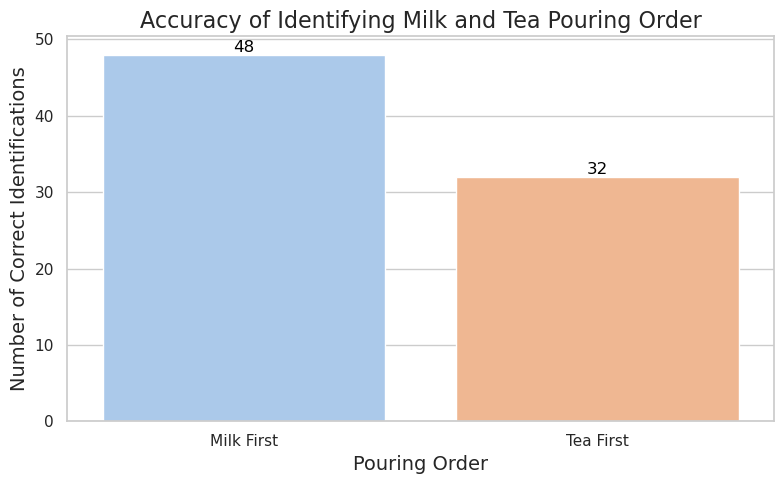

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for the experiment
data = {
    "Order": ["Milk First", "Tea First"],
    "Correct Identifications": [48, 32]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x="Order", y="Correct Identifications", data=df, palette="pastel")

# Adding titles and labels
plt.title("Accuracy of Identifying Milk and Tea Pouring Order", fontsize=16)
plt.xlabel("Pouring Order", fontsize=14)
plt.ylabel("Number of Correct Identifications", fontsize=14)

# Annotating the bars with the actual numbers
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()


#### Null Hypothesis: p = 0.5
#### Alternative Hypothesis: p>0.5
####  sample proportion = 40/80= 0.6125
#### Now lets calculate the z-score

In [8]:
import numpy as np
import scipy.stats as stats

# Given data
n = 80
x = 49  # number of correct identifications
p0 = 0.5  # null hypothesis proportion
hat_p = x / n  # sample proportion

# Calculate the test statistic (z-score)
z = (hat_p - p0) / np.sqrt((p0 * (1 - p0)) / n)
z


2.0124611797498115

#### Now lets calculate the p-value

In [9]:
# Calculate p-value for the one-tailed test
p_value = 1 - stats.norm.cdf(z)
p_value

0.022085672454221217

### Analysis: 
The calculated z-score indicates how far our observed proportion deviates from the null hypothesis proportion.


 The analysis of the p-value will lead us to either reject or fail to reject the null hypothesis. A low p-value (less than 0.05) would suggest that there is significant evidence that the proportion of students who can accurately identify the order of milk and tea being poured is greater than 50%, indicating that the students are not guessing randomly.however in our case the p value falls between 0.05 > p > 0.01 meaning that there is Moderate evidence against the null hypothesis

# Question 9
Yes

## CHATGPTLINK: https://chatgpt.com/share/670db343-38f4-8003-b47a-fb28c60172fc